In [293]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from time import time
from typing import Tuple

In [294]:
def slide_window(image: np.ndarray, win_dim: Tuple[int, int], win_type: str = "mean") -> np.ndarray:
    """
    Slides a window along the image and sets the pixel values as specified by "win_type".

    Parameters:
    - image : Input image as a NumPy n-dimensional array (grayscale only).
    - win_dim : Size of the window (height, width).
    - win_type : The value the pixels inside the window must take.
        e.g., "mean" for mean value of pixels,
              "median" for median of pixel values,
              "max" for max value of the pixel,
              "min" for min value of the pixel.

    Returns:
    - np.ndarray
        The final image, reduced in size based on the window dimensions.
    """
    
    # Check if the window_size is compatible
    win_h, win_w = win_dim[0], win_dim[1]
    H, W = image.shape

    if H % win_h != 0:
        raise ValueError(f"Error: Image height {H} is not divisible by window height {win_h}.")
    if W % win_w != 0:
        raise ValueError(f"Error: Image width {W} is not divisible by window width {win_w}.")

    # Normalize the image
    normalized_image = cv2.normalize(
        image,
        None,
        alpha=0,
        beta=255,
        norm_type=cv2.NORM_MINMAX
    )

    # Calculate the dimensions of the output image
    output_h = H // win_h
    output_w = W // win_w
    output_image = np.zeros((output_h, output_w), dtype=normalized_image.dtype)

    # Slide the window across the image
    for i in range(output_h):
        for j in range(output_w):
            # Get the current window slice
            image_slice = normalized_image[i * win_h:(i + 1) * win_h, j * win_w:(j + 1) * win_w]

            # Calculate the value based on win_type
            if win_type == "mean":
                val = np.mean(image_slice)
            elif win_type == "median":
                val = np.median(image_slice)
            elif win_type == "max":
                val = np.max(image_slice)
            elif win_type == "min":
                val = np.min(image_slice)
            else:
                raise ValueError(f"Unsupported win_type: {win_type}")

            # Set the value in the output image
            output_image[i, j] = val

    return output_image

In [295]:
def calculate_error(image: np.ndarray) -> Tuple[int, int]:
    """
    Calculates the distance between the segment with the smallest value to the center of the image.

    Parameters:
    - image : np.ndarray
        The image with reduced dimensions (output of the "slide_window" function).

    Returns:
    - Tuple[int, int]
        A tuple containing the distance of the center of the segment of interest 
        to the center of the image.
    """
    lowest_val = np.argmin(image)
    min_x, min_y = np.unravel_index(lowest_val, image.shape)

    return (min_x, min_y)

In [296]:
image = cv2.imread("../outputs/Transfer-Learning/gen-2/69.png", cv2.IMREAD_GRAYSCALE)
H, W = image.shape
SCALE = 40
win_h = 10
win_w = 10
win_type = "median"

start = time()
slid_image = slide_window(image, (win_h, win_w), win_type)
end = time()

print((end - start))
print(slid_image.shape)

0.004740715026855469
(12, 16)


In [297]:
x, y = calculate_error(slid_image)
print(x, y)

seg_center_x = (x * win_h)
seg_center_y = (y * win_w)

print(seg_center_x, seg_center_y)

6 13
60 130


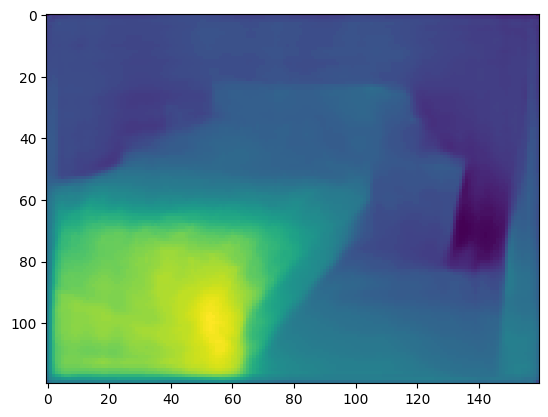

In [298]:
plt.scatter(seg_center_x, seg_center_y, c = "red")
plt.imshow(image)